In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits



/var/folders/sy/vxhnb6x11wz6mkt7x_sw_y140000gn/T/ipykernel_64804/1139064183.py:37: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,2400)


(0.6597620100560355, 2400)

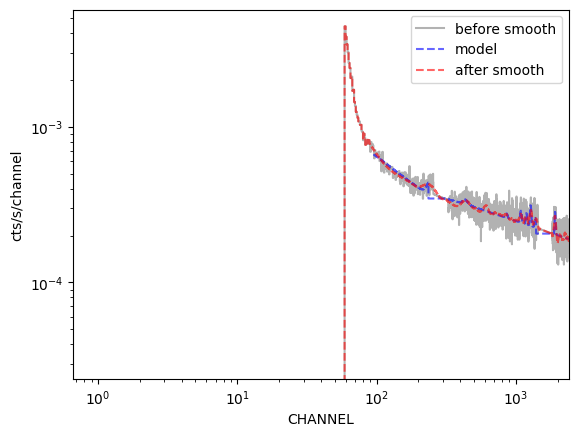

In [72]:
# make plot
filepath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID3460/fitting'
## original pha
ori_file = f'{filepath}/pnS003-back-SDSSTG3460_bkg.pi'
ori_f = fits.open(ori_file)
## bkgsmooth pha
file = f'{filepath}/pnS003-back-smoothed_savgol-140-5.pi'
f = fits.open(file)

## model pha
mdl_file = f'{filepath}/../fit_231019/dats/qpb_pn_bkg.qdp'
import pandas as pd
mdl_file = f'{filepath}/../fit_231019/dats/qpb_pn_bkg.qdp'
mdl_df = pd.read_csv(mdl_file, skiprows=3, header=None, delim_whitespace=True)
mdl_f = mdl_df.iloc[:, 4]

# ## bkgsmooth pha
# txt_file = f'{filepath}/pnS003-back-smoothed_savgol-140-10.txt'
# txt_f = pd.read_csv(txt_file, header = None, delim_whitespace=True)
# rmf_f = fits.open(f'{filepath}/pnS003-SDSSTG3460_bkg.rmf')
# ebins = np.insert(rmf_f[2].data['E_MIN'],0,1e-5)
plt.step(f[1].data['CHANNEL'], ori_f[1].data['RATE'], alpha = 0.3, label = 'before smooth', color = 'k')
# plt.step(f[1].data['CHANNEL'], ori_f[1].data['COUNTS']/16445, alpha = 0.3, label = 'before smooth', color = 'k')
plt.step(mdl_df.iloc[:,0], mdl_f, alpha = 0.6, linestyle = 'dashed', label = 'model', color = 'b')
plt.step(f[1].data['CHANNEL'], f[1].data['RATE'],  alpha = 0.6, linestyle = 'dashed', label = 'after smooth',  color = 'r')
# plt.step(f[1].data['CHANNEL'], txt_f.iloc[:,2]*12.6,  alpha = 0.6, linestyle = 'dashed', label = 'txt',color = 'purple')
# plt.stairs(f[1].data['RATE']/np.diff(ebins), ebins, alpha = 0.6, linestyle = 'dashed', label = 'after smooth',  color = 'r')
# plt.xlabel('E [keV]')
plt.xlabel('CHANNEL')
plt.ylabel('cts/s/channel')
plt.xscale('log')
plt.yscale('log')
# NOTICE 500-2000 channel for mos
f.close()
# rmf_f.close()
plt.legend()
plt.xlim(0,2400)
# plt.xlim(0.5,10)
# plt.ylim(5e-6, 4e-5)


Text(0, 0.5, 'cts/s/channel')

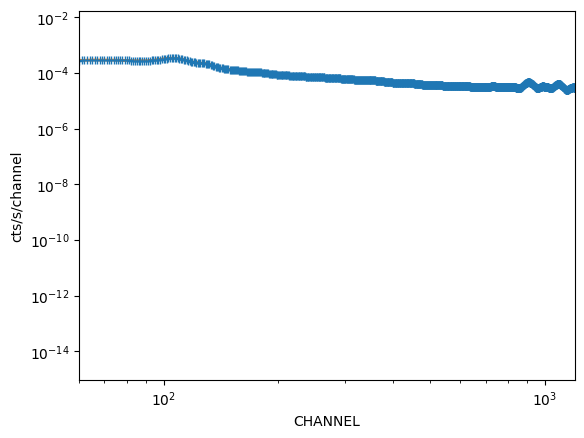

In [45]:
import pandas as pd
filepath = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/data/ID3460/eckert/ID3460/0903892401/SDSSTG3460_reg6'
dat_file = f'{filepath}/../SDSSTG3460_reg6/pnS003-allbkg-SDSSTG3460_reg6.pi'
with fits.open(dat_file) as f:
    dat_y = f[1].data['RATE']
    dat_x = f[1].data['CHANNEL']
    dat_yerr = f[1].data['STAT_ERR']

mdl_file = f'{filepath}/../fit_231019/dats/atable_pnS003_reg6.qdp'
mdl_df = pd.read_csv(mdl_file, skiprows=3, header=None, delim_whitespace=True)
mdl_f = mdl_df.iloc[:, 4]
plt.errorbar(dat_x, dat_y, yerr = dat_yerr, fmt = '+', linewidth = 0.1)
plt.step(mdl_df.iloc[:, 0], mdl_df.iloc[:, 4], linewidth = 2)
# plt.step(mdl_df.iloc[:, 0], mdl_df.iloc[:, 5])
# plt.step(mdl_df.iloc[:, 0], mdl_df.iloc[:, 6])
plt.xscale('log')
plt.yscale('log')
plt.xlim(60,1200)
# print(mdl_df.iloc[:, 5])
# plt.ylim(1e-5, 1e-2)
plt.xlabel('CHANNEL')
plt.ylabel('cts/s/channel')